In [2]:
# !python3 -m pip install opencv-contrib-python --user

In [1]:
import cv2
import matplotlib.pyplot as plt

In [7]:
img1 = cv2.imread('robot3.jpg')
img1.shape

(1000, 766, 3)

In [8]:
sift_d = cv2.SIFT_create() # Scale Invariant Feature Transform
orb_d = cv2.ORB_create()   # Oriented FAST and Rotated BRIEF
surf_d = cv2.xfeatures2d.SURF() # Speeded Up Robust Features

In [9]:
kp1, des1 = sift_d.detectAndCompute(img1, None) # Keypoints, Descriptors

In [11]:
len(kp1)

3877

In [12]:
img2 = cv2.imread('robot.jpeg')
kp2, des2 = sift_d.detectAndCompute(img2, None)
len(kp2)

790

In [17]:
kp10 = kp1[1]
kp10.size

2.0023109912872314

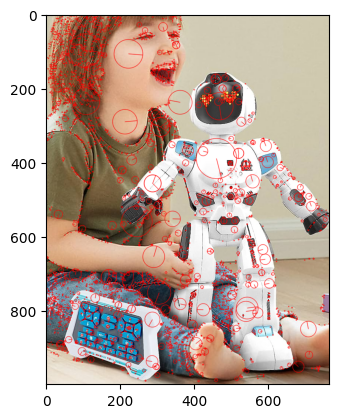

In [18]:
img1_kp = cv2.drawKeypoints(
    img1, kp1, 0, (0,0,255),cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)
plt.imshow(img1_kp[:,:,::-1])

In [22]:
len(kp1)

3877

In [21]:
des1.shape

(3877, 128)

In [23]:
matcher = cv2.BFMatcher()

In [27]:
matches = matcher.knnMatch(des1, des2, k = 2)
len(matches)

3877

In [30]:
count = 0
th = 20
for m1, m2 in matches:
    gap = abs(m1.distance - m2.distance)
    if gap < th:
        count += 1
print(count, len(matches))

2535 3877


In [31]:
100*2535/3877

65.38560742842404